## Efecto de las distintas formas de medir distancia entre clusters en el clustering jerárquico

Adaptado de [https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html)

Este notebook nos sirve para ilustrar cómo funcionan los distintos métodos para medir distancia entre clusters que hemos visto en clase: simple, completo y medio.

Para ello usaremos datos sintéticos.

Podemos jugar con la inicialización de los clusters

In [1]:

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


In [2]:
n_samples = 1500



noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05, random_state=8)


noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05, random_state=8)


blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)


np.random.seed(1)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation1 = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso1 = np.dot(X, transformation1)
aniso1 = (X_aniso1, y)


transformation2 = [[0.5, -0.2], [-0.4, 0.7]]
X_aniso2 = np.dot(X, transformation2)
aniso2 = (X_aniso2, y)


# blobs with varied variances
varied1 = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


varied2 = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.0, 0.5],
                             random_state=random_state)

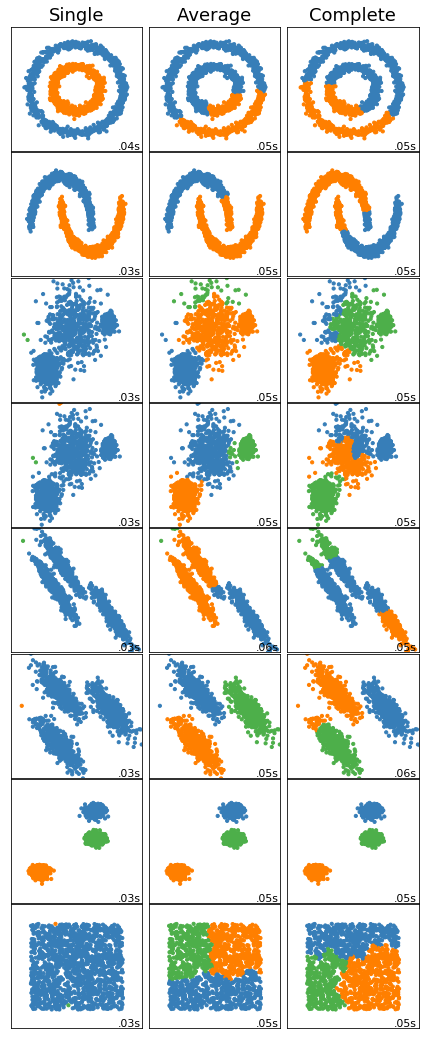

In [3]:
# Set up cluster parameters
plt.figure(figsize=(3 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied1, {'n_neighbors': 2}),
    (varied2, {'n_neighbors': 2}),
    (aniso1, {'n_neighbors': 2}),
    (aniso2, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
#    ward = cluster.AgglomerativeClustering(
#        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single', single),
        ('Average', average),
        ('Complete', complete),
 #       ('Ward', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=11,
                 horizontalalignment='right')
        plot_num += 1

plt.show()